# Import modules

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb

# Read CSV

In [2]:
df = pd.read_csv('archive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Analyze data

In [3]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing data

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

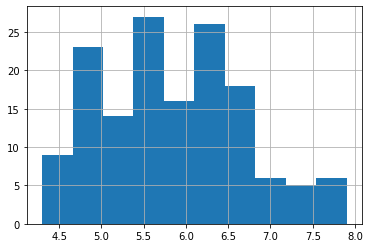

In [7]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

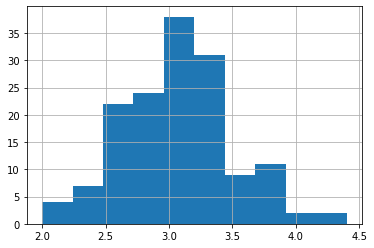

In [8]:
df['SepalWidthCm'].hist()

In [9]:
colors = ['red', 'orange', 'yellow']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

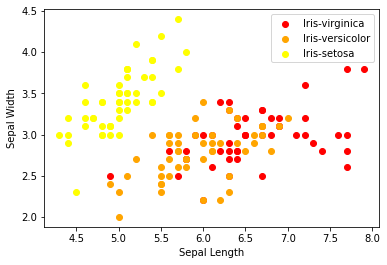

In [10]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# Cooralation matrix

<AxesSubplot:>

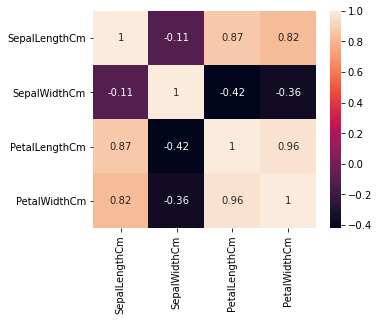

In [11]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

# Label encoder

In [12]:
le = LabelEncoder()

In [13]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model training

In [14]:
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

### Logistic Regression

In [15]:
model = LogisticRegression(max_iter=1000)

In [16]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
print('Accuracy: ', model.score(x_test, y_test) * 100, '%')

Accuracy:  100.0 %


### Decision Tree

In [18]:
model = tree.DecisionTreeClassifier()

In [19]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(179.35714285714286, 199.32, 'X[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [35, 34, 36]'),
 Text(155.44285714285715, 163.07999999999998, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(203.27142857142857, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(119.57142857142857, 126.83999999999999, 'X[2] <= 5.05\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(71.74285714285715, 90.6, 'X[0] <= 4.95\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(47.82857142857143, 54.359999999999985, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(23.914285714285715, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(71.74285714285715, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(95.65714285714286, 54.359999999999985, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(167.4, 90.6, 'X[1] <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(143.485714285

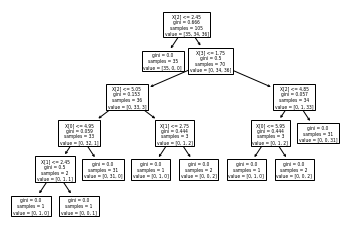

In [20]:
tree.plot_tree(model)

In [21]:
print('Accuracy: ', model.score(x_test, y_test) * 100, '%')

Accuracy:  95.55555555555556 %


### Random forest

In [22]:
model = RandomForestClassifier()

In [23]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
print('Accuracy: ', model.score(x_test, y_test) * 100, '%')

Accuracy:  95.55555555555556 %


### XGBoost

In [28]:
model = xgb.XGBClassifier(objective='binary:logistic', missing=None, use_label_encoder=False, eval_metric='mlogloss')

In [29]:
model.fit(x_train, y_train, verbose=True, eval_set=[(x_test, y_test)])

[0]	validation_0-mlogloss:0.74382
[1]	validation_0-mlogloss:0.53363
[2]	validation_0-mlogloss:0.39551
[3]	validation_0-mlogloss:0.30139
[4]	validation_0-mlogloss:0.23630
[5]	validation_0-mlogloss:0.18621
[6]	validation_0-mlogloss:0.15938
[7]	validation_0-mlogloss:0.14106
[8]	validation_0-mlogloss:0.12716
[9]	validation_0-mlogloss:0.11419
[10]	validation_0-mlogloss:0.10725
[11]	validation_0-mlogloss:0.10246
[12]	validation_0-mlogloss:0.09905
[13]	validation_0-mlogloss:0.09507
[14]	validation_0-mlogloss:0.09218
[15]	validation_0-mlogloss:0.09188
[16]	validation_0-mlogloss:0.09252
[17]	validation_0-mlogloss:0.09358
[18]	validation_0-mlogloss:0.09579
[19]	validation_0-mlogloss:0.09817
[20]	validation_0-mlogloss:0.10020
[21]	validation_0-mlogloss:0.10229
[22]	validation_0-mlogloss:0.10394
[23]	validation_0-mlogloss:0.10567
[24]	validation_0-mlogloss:0.10705
[25]	validation_0-mlogloss:0.10820
[26]	validation_0-mlogloss:0.11007
[27]	validation_0-mlogloss:0.11099
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [30]:
node_params = {'shape':'box', 'style':'filled, rounded', 'fillcolor':'#78cbe'}
leaf_params = {'shape':'box', 'style':'filled', 'fillcolor':'#e48038'}
#xgb.to_graphviz(model, num_trees=0, size="10,10", condition_node_params=node_params, leaf_node_params=leaf_params)